# Exercise 01

## Task 1. A simple SIR model

In the first lecture you were introduced to a simple epidemiological model, the so-called SIR model, defined by

$$
\frac{dS}{dt} = - \beta \frac{S I}{N}, \quad \frac{dI}{dt} = \beta \frac{S I}{N} - \gamma I, \quad \frac{dR}{dt} = \gamma I;
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1.1

Assume a total population of $ N = 1000 $. Define a SIR model with $ \beta = 2.4 $, $ \gamma = 1/20 $, one initial sick patient, and 60 percent of the population susceptible to illness, and plot its time evolution until the dynamics run into a fixed point.

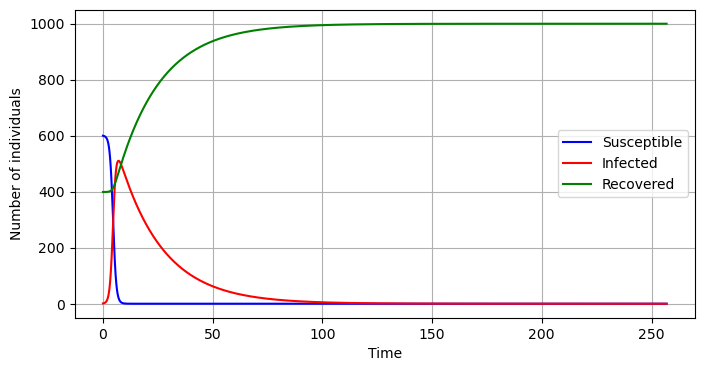

In [2]:
N = 1000  # total
I0 = 1  # infected
S0 = N * 0.6  # susceptible
R0 = N - S0 - I0  # recovered

beta = 2.4  # infect rate
gamma = 1 / 20  # recovery rate

tolerance = 1e-6

# SIR model
def deriv(S, I, R, N, beta, gamma):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

# time evolution
def run_until_fixed_point(S0, I0, R0, N, beta, gamma, deriv, tolerance):
    S, I, R = S0, I0, R0
    t = 0
    dt = 0.01
    S_values, I_values, R_values, t_values = [S], [I], [R], [t]

    while True:    
        dS, dI, dR = deriv(S, I, R, N, beta, gamma)
        S_new = S + dS * dt
        I_new = I + dI * dt
        R_new = R + dR * dt

        # check if reach a fixed point
        if abs(S_new - S) < tolerance and abs(I_new - I) < tolerance and abs(R_new - R) < tolerance:
            break

        S, I, R = S_new, I_new, R_new
        t += dt

        S_values.append(S)
        I_values.append(I)
        R_values.append(R)
        t_values.append(t)

    return t_values, S_values, I_values, R_values

# run 
t_values, S_values, I_values, R_values = run_until_fixed_point(S0, I0, R0, N, beta, gamma, deriv, tolerance)

# plot
plt.figure(figsize=(8, 4))
plt.plot(t_values, S_values, 'b', label='Susceptible')
plt.plot(t_values, I_values, 'r', label='Infected')
plt.plot(t_values, R_values, 'g', label='Recovered')
plt.xlabel('Time')
plt.ylabel('Number of individuals')

plt.legend()
plt.grid()
plt.show()


### Task 1.2

Adjust the model for the case that infections do not confer long-term immunity to the disease (this means that recovered patients instead fall back to the susceptible group). Depending on different values for $ \beta $ and $ \gamma $, what are the two types of long-term behavior that this model predicts?

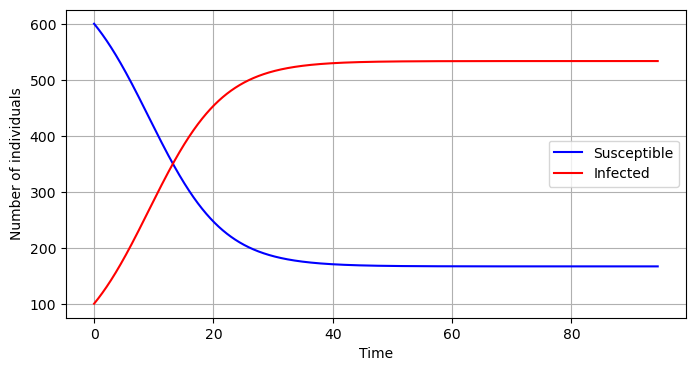

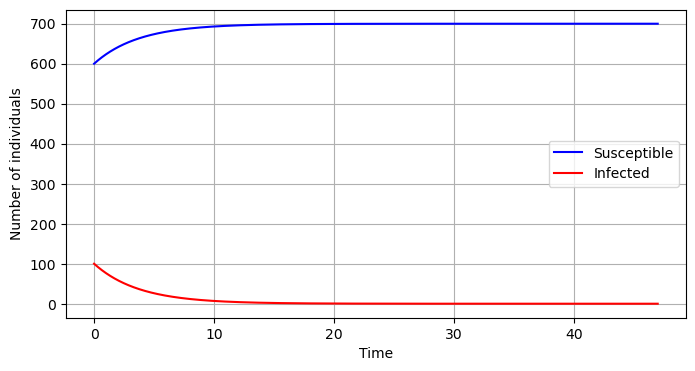

In [3]:
N = 1000  # total
I0 = 100  # infected
S0 = N * 0.6  # susceptible

tolerance = 1e-6

# adjusted SIR model
def deriv(S, I, N, beta, gamma):
    dSdt = -beta * S * I / N + gamma * I
    dIdt = beta * S * I / N - gamma * I
    return dSdt, dIdt

# time evolution
def run_until_fixed_point(S0, I0, N, beta, gamma, tolerance):
    S, I = S0, I0
    t = 0
    dt = 0.01
    S_values, I_values, t_values = [S], [I], [t]

    while True:
        dS, dI = deriv(S, I, N, beta, gamma)
        S_new = S + dS * dt
        I_new = I + dI * dt

        # check if reach a fixed point
        if abs(S_new - S) < tolerance and abs(I_new - I) < tolerance:
            break

        S, I = S_new, I_new
        t += dt

        S_values.append(S)
        I_values.append(I)
        t_values.append(t)

    return t_values, S_values, I_values
 
# beta = 0.3, gamma = 0.05
t_values, S_values, I_values = run_until_fixed_point(S0, I0, N, 0.3, 0.05, tolerance)

# plot
plt.figure(figsize=(8, 4))
plt.plot(t_values, S_values, 'b', label='Susceptible')
plt.plot(t_values, I_values, 'r', label='Infected')
plt.xlabel('Time')
plt.ylabel('Number of individuals')

plt.legend()
plt.grid()
plt.show()

# beta = 0.05 gamma = 0.3
t_values, S_values, I_values = run_until_fixed_point(S0, I0, N, 0.05, 0.3, tolerance)

# plot
plt.figure(figsize=(8, 4))
plt.plot(t_values, S_values, 'b', label='Susceptible')
plt.plot(t_values, I_values, 'r', label='Infected')
plt.xlabel('Time')
plt.ylabel('Number of individuals')

plt.legend()
plt.grid()
plt.show()

### Task 1.3

Assume a mortality rate of 1 percent, and include deceased patients into the model. Plot the time evolution of the new model.

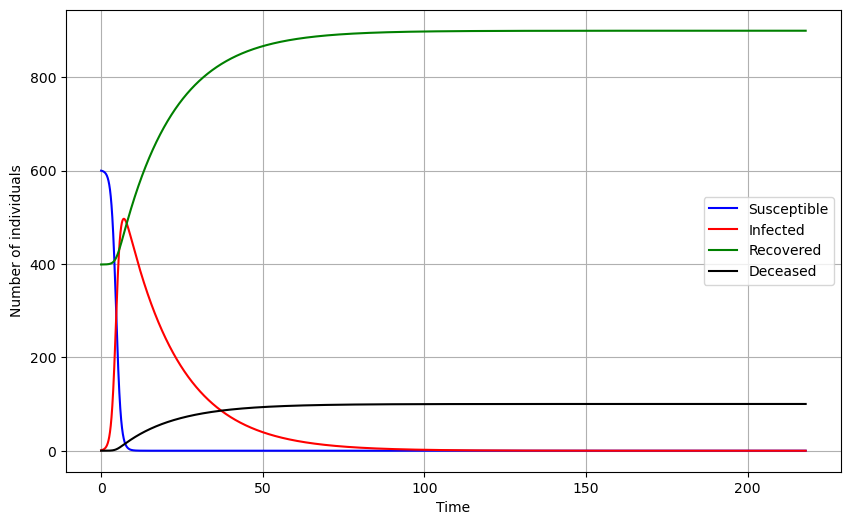

In [4]:
N = 1000  # total
I0 = 1  # infected
S0 = N * 0.6  # susceptible
R0 = N - S0 - I0  # recovered

beta = 2.4  # infect rate
gamma = 1 / 20  # recovery rate

D0 = 0  # deceased
mortality_rate = 0.01  # mortality rate

tolerance = 1e-6

# SIR model included deceased paitients
def deriv(S, I, R, D, N, beta, gamma, mortality_rate):
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mortality_rate * I
    dRdt = gamma * I
    dDdt = mortality_rate * I
    return dSdt, dIdt, dRdt, dDdt

# time evolution
def run_until_fixed_point(S0, I0, R0, D0, N, beta, gamma, mortality_rate, tolerance):
    S, I, R, D = S0, I0, R0, D0
    t = 0
    dt = 0.01
    S_values, I_values, R_values, D_values, t_values = [S], [I], [R], [D], [t]

    while True:
        dS, dI, dR, dD = deriv(S, I, R, D, N, beta, gamma, mortality_rate)
        S_new = S + dS * dt
        I_new = I + dI * dt
        R_new = R + dR * dt
        D_new = D + dD * dt

        # check if reach a fixed point
        if abs(S_new - S) < tolerance and abs(I_new - I) < tolerance and abs(R_new - R) < tolerance and abs(D_new - D) < tolerance:
            break

        S, I, R, D = S_new, I_new, R_new, D_new
        t += dt

        S_values.append(S)
        I_values.append(I)
        R_values.append(R)
        D_values.append(D)
        t_values.append(t)

    return t_values, S_values, I_values, R_values, D_values

# run
t_values, S_values, I_values, R_values, D_values = run_until_fixed_point(S0, I0, R0, D0, N, beta, gamma, mortality_rate, tolerance)

# plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, S_values, 'b', label='Susceptible')
plt.plot(t_values, I_values, 'r', label='Infected')
plt.plot(t_values, R_values, 'g', label='Recovered')
plt.plot(t_values, D_values, 'k', label='Deceased')
plt.xlabel('Time')
plt.ylabel('Number of individuals')

plt.legend()
plt.grid()
plt.show()

## Task 2. Higher order ODE systems

Show that any $n$-th order ODE of the form $ f(t, x, \frac{dx}{dt}, \frac{d^2x}{dt^2}, \cdots, \frac{d^nx}{dt^n}) = 0 $ can always be transformed into a system of $n$ first-order ODEs.

First we introduce new variables to represent each derivative of $ x $ up to order $ n-1 $. 

Let:

$$
\begin{aligned}
y_1 &= x \\
y_2 &= x' \\
y_3 &= x'' \\
&\vdots \\
y_n &= x^{(n-1)}
\end{aligned}
$$ 

By the definition of derivatives:
$$
\begin{aligned}
y_1' &= y_2 \\
y_2' &= y_3 \\
&\vdots \\
y_{n-1}' &= y_n \\
\end{aligned}
$$

Rewrite the original equation using the new variables:
$$
f\left(t, y_1, y_2, \dots, y_n, y_n'\right) = 0
$$
Solve for $ y_n' $:
$$
y_n' = \phi(t, y_1, y_2, \dots, y_n)
$$


Now we get the $ n $ first-order ODEs:
$$
\begin{cases}
y_1' = y_2 \\
y_2' = y_3 \\
\quad \vdots \\
y_{n-1}' = y_n \\
y_n' = \phi(t, y_1, y_2, \dots, y_n)
\end{cases}
$$

## Task 3. ODEs on the real line

Explain/show why one-dimensional ODEs on the real line can never give rise to oscillatory behavior.

This is because the sign of the derivative $ \frac{dx}{dt} = f(t, x) $ determines whether $ x(t) $ is increasing or decreasing. If $ f(t, x) > 0 $, the solution always increases; if $ f(t, x) < 0 $, the solution always decreases. For oscillations to occur, the derivative must repeatedly change sign over continuous intervals, but in one dimension, this can only happen at isolated points, making it impossible to form periodic oscillations. Therefore, solutions of one-dimensional ODEs cannot exhibit oscillatory behavior.

## Task 4. Flow field of linear ODEs

Assume a linear ODE system, defined by 

$$
\frac{dx}{dt} = A \cdot \mathbf{x}, \quad \text{where} \quad A = \begin{pmatrix} 0.1 & -0.3 \\ 0.2 & -0.3 \end{pmatrix}, \quad \text{and} \quad \mathbf{x} = \begin{pmatrix} x_1 \\ x_2 \end{pmatrix}
$$

### Task4.1

Determine the fixed points of this system by hand.

We set $\frac{d\mathbf{x}}{dt} = \mathbf{0}$. This gives us:

$$
A \cdot \mathbf{x} = \mathbf{0},
$$

which is

$$
\begin{cases}
0.1x_1 - 0.3x_2 = 0, \\
0.2x_1 - 0.3x_2 = 0.
\end{cases}
$$

By solving this equations, we get $x_1 = x_2 = 0$.

Thus the only fixed point of the system is at $\mathbf{x} = \begin{pmatrix} 0 \\ 0 \end{pmatrix}$.

### Task4.2

Plot the time evolution of the system for an initial vector of $ \mathbf{x_0} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} $.

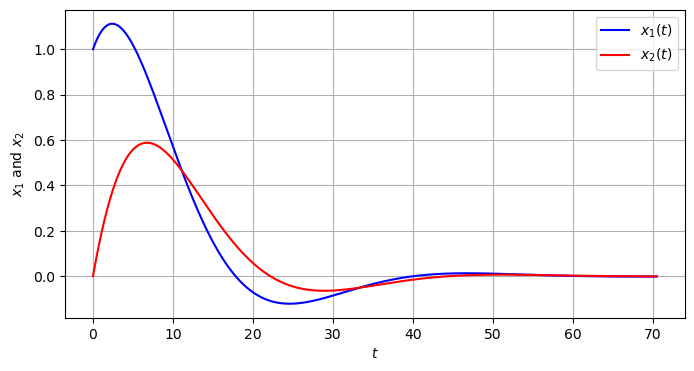

In [5]:
A = np.array([[0.1, -0.3], [0.2, -0.3]])
x = np.array([1, 0])

t = 0
dt = 0.01

x_values, t_values = [x], [t]


# iterate
while True:
    x_new = x + dt * (A @ x)
    if np.linalg.norm(x_new - x) < tolerance:
        break

    x = x_new
    t += dt

    x_values.append(x)
    t_values.append(t)

x_values = np.array(x_values)

# plot
plt.figure(figsize=(8, 4))
plt.plot(t_values, x_values[:, 0], label='$x_1(t)$', color='b')
plt.plot(t_values, x_values[:, 1], label='$x_2(t)$', color='r')
plt.xlabel('$t$')
plt.ylabel('$x_1$ and $x_2$')

plt.legend()
plt.grid()
plt.show()


### Task4.3

Plot the flow field of the system in an appropriate range. What do you observe?

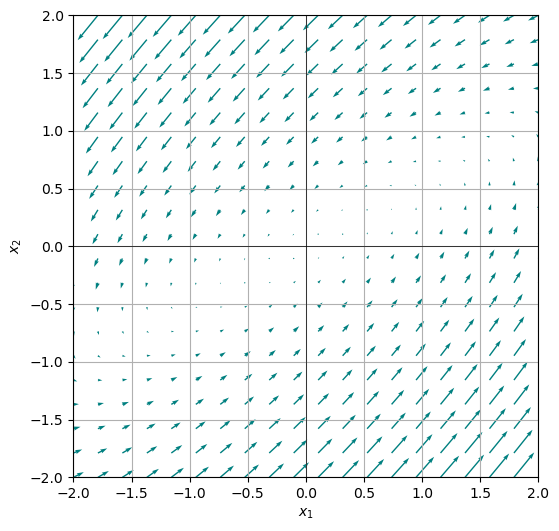

In [6]:
x1_range = np.linspace(-2, 2, 20)
x2_range = np.linspace(-2, 2, 20)
x1, x2 = np.meshgrid(x1_range, x2_range)

# flow field vectors
u = A[0, 0] * x1 + A[0, 1] * x2
v = A[1, 0] * x1 + A[1, 1] * x2

# plot
plt.figure(figsize=(6, 6))
plt.quiver(x1, x2, u, v, color='teal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

plt.grid()
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='black', lw=0.5)
plt.show()

- The arrows indicate the direction of movement in the phase space, which shows how the system evolves over time for different initial conditions.
- The fixed point at the origin \((0, 0)\) is clearly visible, meaning all nearby trajectories move towards this point.
- The flow indicates a spiral-like movement towards the origin, which suggests that the fixed point is stable.

### Task4.4

In the lecture you learned about several different types of dynamics (see also figure 5.2.8. in the Strogatz book) that can be obtained from a two-dimensional linear dynamical system (unstable node, stable node, saddle point, line attractor, degenerate node, stable spiral, unstable spiral and center). Define system parameters of your choosing that satisfy the respective requirements, and plot the corresponding trajectories and flow fields.

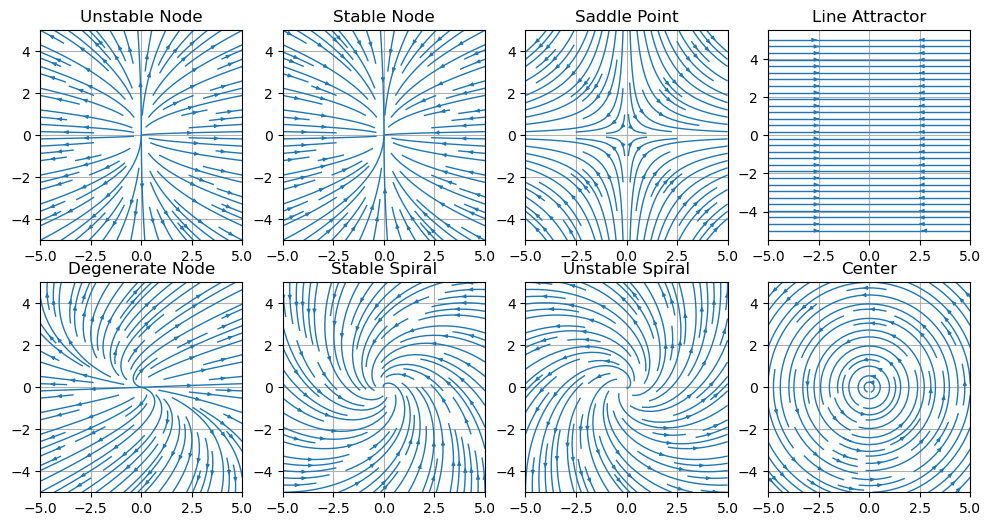

In [7]:
fig, axes = plt.subplots(2, 4, figsize=(12, 6))

def plot_phase_portrait(A, title, ax):
    x1 = np.linspace(-5, 5, 20)
    x2 = np.linspace(-5, 5, 20)
    X1, X2 = np.meshgrid(x1, x2)

    U = A[0,0] * X1 + A[0,1] * X2
    V = A[1,0] * X1 + A[1,1] * X2

    # plot
    ax.streamplot(X1, X2, U, V, density=1, linewidth=1, arrowsize=0.5)
    ax.set_title(title)
    ax.grid()

# Define system matrices and titles
systems = [
    (np.array([[ 2,  0], [0,  1]]), 'Unstable Node'),
    (np.array([[-2,  0], [0, -1]]), 'Stable Node'),
    (np.array([[ 1,  0], [0, -1]]), 'Saddle Point'),
    (np.array([[-1,  0], [0,  0]]), 'Line Attractor'),
    (np.array([[ 1,  1], [0,  1]]), 'Degenerate Node'),
    (np.array([[-1, -1], [1, -1]]), 'Stable Spiral'),
    (np.array([[ 1, -1], [1,  1]]), 'Unstable Spiral'),
    (np.array([[ 0, -1], [1,  0]]), 'Center')
] 

# Plot each system
for i, (A, title) in enumerate(systems):
    plot_phase_portrait(A, title, axes[i//4][i%4])

plt.show()